# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  5644k      0  0:00:16  0:00:16 --:--:-- 7268k09  0:00:11 6235k
total 1832
-rw-r--r--     1 terence  staff       0 Jun 29 09:13 README.md
-rw-r--r--@    1 terence  staff  935327 Jun 30 17:11 image_denoising.ipynb
drwx------  1087 terence  staff   34784 Jun  9 15:06 paintings
drwxr-xr-x     8 terence  staff     256 Jun 30 17:10 tests


In [2]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

In [3]:
from PIL import Image

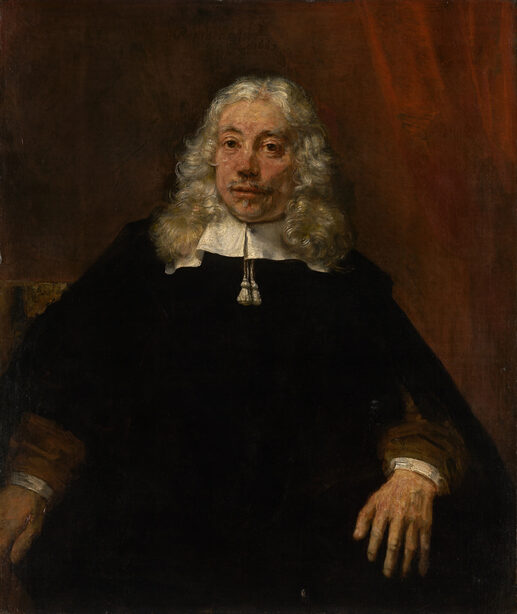

In [4]:
img_53 = Image.open(dataset_paths[53])
img_53

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [6]:
# YOUR CODE HERE
import numpy as np
img_shape = np.shape(img_53)
img_shape

(614, 517, 3)

In [7]:
img_dim=img_shape[2]
img_dim

3

❓ **What was in the image above?**

In [8]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [9]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [10]:
# YOUR CODE HERE
dataset_images = []
for i in range(400):    
    img = Image.open(dataset_paths[i])
    dataset_images.append(np.array(img))

In [11]:
np.shape(dataset_images)

(400,)

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [12]:
# YOUR CODE HERE
# Not a correct shape

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [13]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in dataset_images]
set([x.ndim for x in dataset_images])

{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [14]:
# YOUR CODE HERE
np.shape(dataset_images[0])

(358, 434, 3)

In [15]:
np.shape(dataset_images[10])

(639, 381, 3)

In [16]:
from tensorflow.image import resize
dataset_resized = []
for i in dataset_images:
    resized = resize(i, (120, 100))
    dataset_resized.append(np.array(resized))

In [17]:
np.shape(dataset_resized)

(400, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [18]:
# YOUR CODE HERE
dataset_scaled = np.array(dataset_resized) / 255

In [19]:
np.min(dataset_scaled), np.max(dataset_scaled)

(0.0, 1.0)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [20]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(400, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

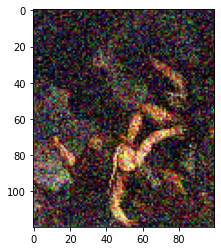

In [21]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.imshow(dataset_noisy[1])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [22]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)

In [23]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [25]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [26]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

encoder = Sequential(name='encoder')
encoder.add(Conv2D(8, (2,2), input_shape=(120, 100, 3), activation='relu'))
encoder.add(MaxPooling2D(2))
encoder.add(Conv2D(8, (2, 2), activation='relu'))
encoder.add(MaxPooling2D(2))  
encoder.add(Flatten())
encoder.add(Dense(latent_dimensions, activation='tanh'))
#encoder = None

In [27]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 119, 99, 8)        104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 48, 8)         264       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 24, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 5568)              0         
_________________________________________________________________
dense (Dense)                (None, 6000)              33414000  
Total params: 33,414,368
Trainable params: 33,414,368
Non-trainable params: 0
_______________________________________________

👉 **Test your encoder below**

In [28]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              33414368  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 33,421,043
Trainable params: 33,421,043
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [29]:
# YOUR CODE HERE
Y_pred = np.mean(Y_train)
print(f'The mean prediction is {Y_pred:.3f}')

absolute_error = [np.abs(y - Y_pred) for y in Y_test]
mean_absolute_error = np.mean(absolute_error)

score_baseline = mean_absolute_error
print(f'Mean absolute error is of {score_baseline:.3f}')

The mean prediction is 0.438
Mean absolute error is of 0.250


❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [30]:
# YOUR CODE HERE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def compile_autoencoder(autoencoder):
    opt = Adam(learning_rate=0.001)
    autoencoder.compile(loss='mse',
                        optimizer=opt,
                        metrics=['mae'])

es = EarlyStopping(patience=5, restore_best_weights=True)
compile_autoencoder(autoencoder)
history = autoencoder.fit(X_train, Y_train, 
                        epochs=20, 
                        batch_size=32, 
                        validation_split=0.3, 
                        callbacks=[es])

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 0.0827 - mae: 0.2514 - val_loss: 0.0739 - val_mae: 0.2341
Epoch 2/20
7/7 [==============================] - 5s 794ms/step - loss: 0.0798 - mae: 0.2463 - val_loss: 0.0702 - val_mae: 0.2272
Epoch 3/20
7/7 [==============================] - 5s 778ms/step - loss: 0.0793 - mae: 0.2450 - val_loss: 0.0683 - val_mae: 0.2223
Epoch 4/20
7/7 [==============================] - 6s 804ms/step - loss: 0.0730 - mae: 0.2314 - val_loss: 0.0674 - val_mae: 0.2209
Epoch 5/20
7/7 [==============================] - 5s 750ms/step - loss: 0.0723 - mae: 0.2310 - val_loss: 0.0666 - val_mae: 0.2197
Epoch 6/20
7/7 [==============================] - 5s 777ms/step - loss: 0.0730 - mae: 0.2317 - val_loss: 0.0645 - val_mae: 0.2154
Epoch 7/20
7/7 [==============================] - 6s 883ms/step - loss: 0.0665 - mae: 0.2194 - val_loss: 0.0598 - val_mae: 0.2058
Epoch 8/20
7/7 [==============================] - 6s 819ms/step - loss: 0.0619 - mae: 0.2094 

In [31]:
score_baseline = autoencoder.evaluate(X_test, Y_test)
score_baseline

3/3 [==============================] - 1s 130ms/step - loss: 0.0333 - mae: 0.1399


[0.03325020149350166, 0.13985714316368103]

❓ **Plot your training and validation loss at each epoch using the cell below**

In [48]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

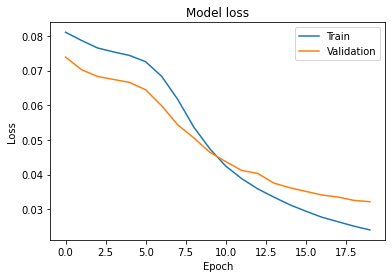

In [49]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')

plot_loss(history)

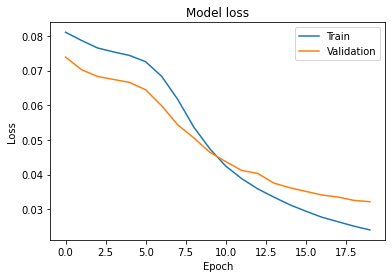

In [50]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')

plot_loss(history)

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [51]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(X_test)
score_test = np.mean(np.abs(Y_test - Y_pred))
score_test

0.13985713

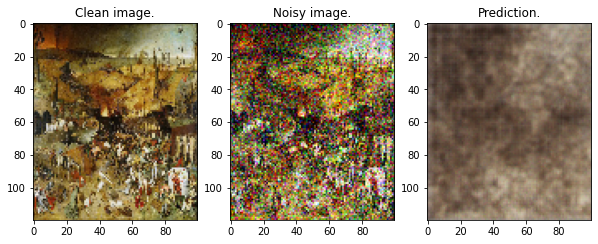

In [52]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 20

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [53]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()